

```
3. Build the Image classification model by dividing the model into the following fourstages:
a. Loading and preprocessing the image data
b. Defining the model’s architecture
c. Training the model
d. Estimating the model’s performance
```



A. Loading and preprocessing the image data

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 [==============================] - 5s 0us/step


B. Defining the model's architecture

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


C. Training the model

In [3]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 79s 49ms/step - loss: 1.5164 - accuracy: 0.4449 - val_loss: 1.2197 - val_accuracy: 0.5682
Epoch 2/10
1563/1563 [==============================] - 74s 48ms/step - loss: 1.1512 - accuracy: 0.5933 - val_loss: 1.0557 - val_accuracy: 0.6236
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0100 - accuracy: 0.6473 - val_loss: 0.9704 - val_accuracy: 0.6605
Epoch 4/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.9198 - accuracy: 0.6780 - val_loss: 0.9355 - val_accuracy: 0.6765
Epoch 5/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.8430 - accuracy: 0.7050 - val_loss: 0.9119 - val_accuracy: 0.6810
Epoch 6/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.7861 - accuracy: 0.7236 - val_loss: 0.8867 - val_accuracy: 0.6925
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7378 - accuracy: 0.7408 - val_loss: 0.8362 -

D. Estimating the model's performance

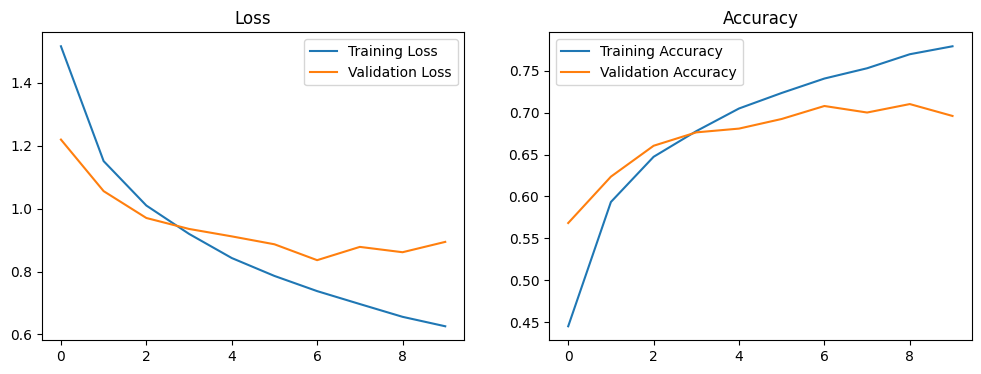

In [4]:
import matplotlib.pyplot as plt

# Plot training loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()


In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 4s - loss: 0.8944 - accuracy: 0.6961 - 4s/epoch - 14ms/step
Test accuracy: 0.6960999965667725
